# Telecom X - Análisis de Evasión de Clientes

##🏢 Contexto del Problema

Telecom X enfrenta una alta tasa de cancelación de clientes (churn), lo que impacta directamente en sus ingresos y crecimiento sostenible. La retención de clientes es una prioridad estratégica, ya que adquirir nuevos clientes suele ser más costoso que mantener los actuales.

En este proyecto, se realizará un análisis exploratorio de datos (EDA) para comprender los factores que influyen en la evasión de clientes. El objetivo es identificar patrones, variables relevantes y posibles relaciones que expliquen por qué ciertos clientes deciden cancelar el servicio.

## 📚 Bibliotecas y librerias

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math

##📌 Extracción

In [3]:
# Extraccion mediante subida directa al colab
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##🔧 Transformación

In [ ]:
print('Tamaño del DataFrame')
print(df.shape)
print('\n Columnas')
print(df.columns)
print('\n Informacion')
print(df.info())

Tamaño del DataFrame
(7267, 21)

 Columnas
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

 Informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   

- Observamos que **Charges.Total** está almacenada como *Object* en lugar de un tipo numérico. Esto será corregido en etapas posteriores del análisis

- Modificaremos el nombre de las columnas para tener un mejor manejo de ellas

In [ ]:
df.columns = (
    df.columns
    .str.lower()                 # todo en minusculas
    .str.replace('.', '_', regex=False)  # reemplazar puntos por _
)

In [ ]:
df.columns = (
    df.columns
    .str.replace('.', '_', regex=False)
    .str.replace('customer_', '')
    .str.replace('phone_', '')
    .str.replace('internet_', '')
    .str.replace('account_', '')
    .str.lower()
)

In [ ]:
df.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

Análisis de frecuencia por variable categórica
- Este análisis permite comprender la composición de cada variable,detectar posibles errores de calidad de datos y evaluar el nivel de desbalance en las categorías antes del modelado.

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 {col}")
    print(df[col].value_counts())

#from enum import unique
#for col in df.select_dtypes(include='object').columns:
  #print(f'valores de {col}: {df[col].unique()}')



🔹 customerid
customerid
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

🔹 churn
churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

🔹 gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

🔹 partner
partner
No     3749
Yes    3518
Name: count, dtype: int64

🔹 dependents
dependents
No     5086
Yes    2181
Name: count, dtype: int64

🔹 phoneservice
phoneservice
Yes    6560
No      707
Name: count, dtype: int64

🔹 multiplelines
multiplelines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

🔹 internetservice
internetservice
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

🔹 onlinesecurity
onlinesecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dty

Se observa que la variable **Churn** presenta tres valores distintos, uno de los cuales corresponde a registros en blanco. Este caso será tratado como un valor faltante y se abordará a continuación. Ademas que averiguaremos si algún otra variable esta pasando por lo mismo.

In [ ]:
# seleccionar columnas tipo object
object_cols = df.select_dtypes(include='object').columns
object_cols


Index(['customerid', 'churn', 'gender', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_total'],
      dtype='object')

In [ ]:
for col in object_cols:
    empty_spaces = (df[col].str.strip() == "").sum()
    if empty_spaces > 0:
        print(f"{col}: {empty_spaces} valores vacíos con espacios")

churn: 224 valores vacíos con espacios
charges_total: 11 valores vacíos con espacios


In [ ]:
total_rows = len(df)

print("Churn vacío (%):", 224 / total_rows * 100)
print("Total Charges vacío (%):", 11 / total_rows * 100)

Churn vacío (%): 3.0824274115866244
Total Charges vacío (%): 0.15136920324755745


Se identifica que, además de **Churn**, la variable **Charges_Total** contiene valores en blanco, lo que provoca su clasificación como tipo *Object*. Considerando que **Churn** es la variable objetivo (target) y que la proporción de valores faltantes es mínima, se optará por eliminar dichos registros, dado que no contribuirían significativamente al análisis ni al proceso de entrenamiento del modelo

In [ ]:
df['churn'] = df['churn'].str.strip() # quitar espacios alrededor
df['churn'] = df['churn'].replace("", pd.NA) # convertir cadenas vacías en NaN
print('Cantidad de valores NaN:', df['churn'].isnull().sum()) # verificar cuantos NaN hay, deberia salirme la misma cantidad que arriba 224

Cantidad de valores NaN: 224


In [ ]:
# Eliminaremos todos los valores NaN
df = df[df['churn'].notna()]

In [ ]:
df['churn'].isnull().sum()
print(df.shape) #confirmamosque se hayan eliminado los valores: 7267 - 224 = 7043 filas

(7043, 21)


ahora pasaremos a analizar los valores en blanco de **Charges_Total**

In [ ]:
for col in object_cols:
    empty_spaces = (df[col].str.strip() == "").sum()
    if empty_spaces > 0:
        print(f"{col}: {empty_spaces} valores vacíos con espacios")

charges_total: 11 valores vacíos con espacios


Persisten valores faltantes en **charges_total**. Se procederá a analizar su relación con la variable tenure, ya que valores de **tenure** = 0 podrían justificar la ausencia de cargos acumulados en **charges_total**.

In [ ]:
df[df["charges_total"].str.strip() == ""]["tenure"].value_counts()

,count
tenure,
0,11


Efectivamente confirmamos que todos tienen **tenure** = 0 por lo tanto procederemos a imputar estos valores

In [ ]:
df["charges_total"] = df["charges_total"].replace(" ", np.nan) # Primero convertimos los valores a NaN
df["charges_total"] = pd.to_numeric(df["charges_total"]) # Luego convertimos a numérico

In [ ]:
print(df['charges_total'].dtype)

float64


In [ ]:
df.loc[df["tenure"] == 0, "charges_total"] = 0 # Finalmente reemplazamos los valores por 0

Se transformaran variables binarias (Yes/No) a formato numérico (1/0) para facilitar futuros modelos predictivos.

In [ ]:
#Primero detectemos columnas binarias
object_cols = df.select_dtypes(include="object").columns

binary_cols = []

for col in object_cols:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) == 2:
        binary_cols.append(col)

for col in binary_cols:
    print(col, "→", df[col].unique())

churn → ['No' 'Yes']
gender → ['Female' 'Male']
partner → ['Yes' 'No']
dependents → ['Yes' 'No']
phoneservice → ['Yes' 'No']
paperlessbilling → ['Yes' 'No']


Una vez evaluadas las variables procederemos al reemplazo

In [ ]:
binary_map = {"Yes": 1, "No": 0}

yes_no_cols = ["churn", "partner", "dependents", "phoneservice", "paperlessbilling"]

for col in yes_no_cols:
    df[col] = df[col].map(binary_map)

df["gender"] = df["gender"].map({"Female": 0, "Male": 1}) #Por convencion es mejor en gender este cambio
df[["churn","gender","partner","dependents","phoneservice","paperlessbilling"]].head()

,churn,gender,partner,dependents,phoneservice,paperlessbilling
0,0,0,1,1,1,1
1,0,1,0,0,1,0
2,1,1,0,0,1,1
3,1,1,1,0,1,1
4,1,0,1,0,1,1


Tambien reemplazaremos los valores que tienen valores similares a NO

In [ ]:
object_cols = df.select_dtypes(include="object").columns

three_cols = []

for col in object_cols:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) == 3:
        three_cols.append(col)
#three_cols

for col in three_cols:
    print(col, "→", df[col].unique())

multiplelines → ['No' 'Yes' 'No phone service']
internetservice → ['DSL' 'Fiber optic' 'No']
onlinesecurity → ['No' 'Yes' 'No internet service']
onlinebackup → ['Yes' 'No' 'No internet service']
deviceprotection → ['No' 'Yes' 'No internet service']
techsupport → ['Yes' 'No' 'No internet service']
streamingtv → ['Yes' 'No' 'No internet service']
streamingmovies → ['No' 'Yes' 'No internet service']
contract → ['One year' 'Month-to-month' 'Two year']


In [ ]:
service_cols = [
    "multiplelines",
    "onlinesecurity",
    "onlinebackup",
    "deviceprotection",
    "techsupport",
    "streamingtv",
    "streamingmovies"
]

for col in service_cols:
    df[col] = df[col].replace(
        ["No internet service", "No phone service"],
        "No"
    )
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [ ]:
df[service_cols].head()

,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,1,1,0,1,1
4,0,0,0,0,1,1,0


##📊 Carga y análisis

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
churn,7043.0,0.27,0.44,0.00,0.00,0.00,1.00,1.00
gender,7043.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00
seniorcitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
partner,7043.0,0.48,0.50,0.00,0.00,0.00,1.00,1.00
dependents,7043.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
phoneservice,7043.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
multiplelines,7043.0,0.42,0.49,0.00,0.00,0.00,1.00,1.00
onlinesecurity,7043.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
onlinebackup,7043.0,0.34,0.48,0.00,0.00,0.00,1.00,1.00


In [ ]:
for col in df.select_dtypes(include="object"):
    print("\n", col)
    print(df[col].value_counts(normalize=True))


 customerid
customerid
9995-HOTOH    0.000142
0002-ORFBO    0.000142
0003-MKNFE    0.000142
9970-QBCDA    0.000142
9968-FFVVH    0.000142
                ...   
0014-BMAQU    0.000142
0013-SMEOE    0.000142
0013-MHZWF    0.000142
0013-EXCHZ    0.000142
0011-IGKFF    0.000142
Name: proportion, Length: 7043, dtype: float64

 internetservice
internetservice
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

 contract
contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

 paymentmethod
paymentmethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64


**Hallazgos importantes**

El churn afecta al 27% de los clientes.

La mayoría de clientes están en contratos mensuales.

Servicios adicionales tienen baja adopción.

Existe alta dispersión en cargos totales.

Tenure presenta gran variabilidad.

La mayoría tiene internet (principalmente fibra).

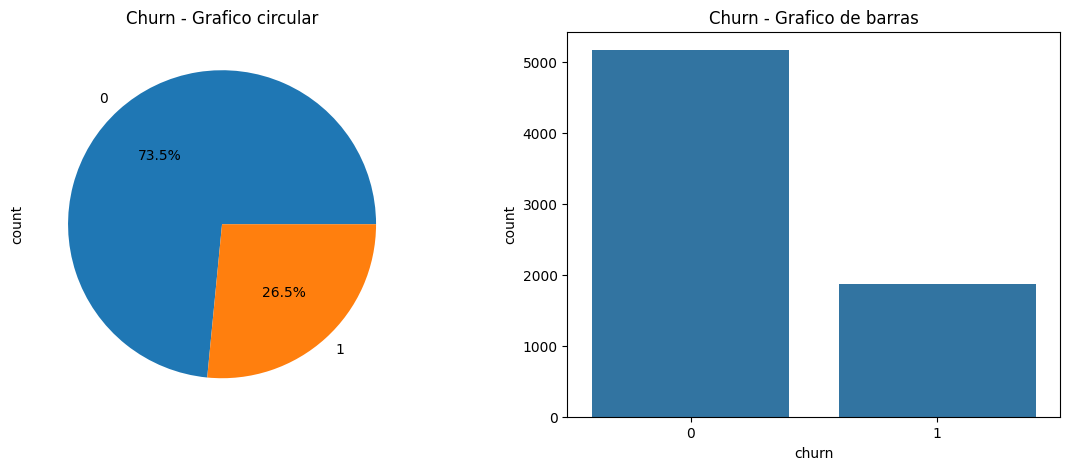

In [ ]:
#Graficaremos 2 tipos de grafico para poder analizar la variable churn
f, ax = plt.subplots(1,2,figsize=(14,5))

# Gráfico de pie
df["churn"].value_counts().plot.pie(autopct="%1.1f%%", ax = ax[0])
ax[0].set_title("Churn - Grafico circular")

# Gráfico de barras
sns.countplot(x="churn", data=df, ax = ax[1])
ax[1].set_title("Churn - Grafico de barras")
plt.show()

Ahora una comparativa con la variable **contract** o tipo de contrato

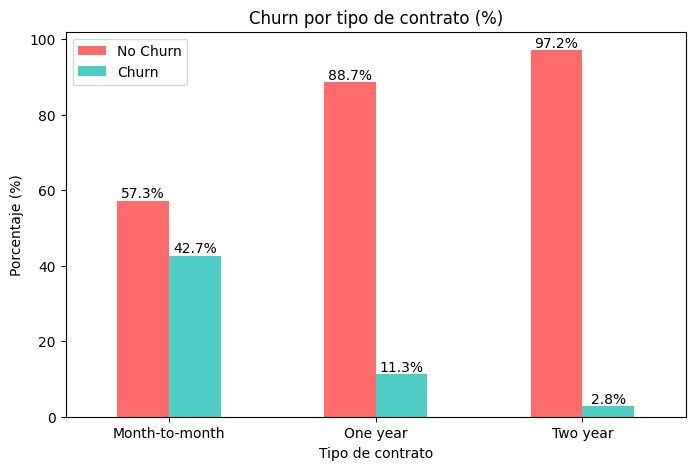

In [ ]:
# Calcular proporciones por contrato
prop = pd.crosstab(df["contract"], df["churn"], normalize="index") * 100

# Graficar
prop.plot(
    kind="bar",
    figsize=(8,5),
    color=['#FF6B6B', '#4ECDC4']
)

plt.title("Churn por tipo de contrato (%)")
plt.xlabel("Tipo de contrato")
plt.ylabel("Porcentaje (%)")
plt.legend(["No Churn", "Churn"])
plt.xticks(rotation=0)

# Agregar etiquetas
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%.1f%%")

plt.show()

El tipo de contrato muestra una relación clara y fuerte con **churn**, los clientes con contratos **month to month** presentan un porcentaje mayor en comparación con los otros contratos, esto sugiere que el tiop de contrato es un factor clave en la retención de clientes.

In [ ]:
#creamos una funcion para poder reutilizar si es necesario mas adelante
def plot_multiple_churn(vars_list, colors=['#FF6B6B', '#4ECDC4']):

    n = len(vars_list)
    cols = 2
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
    axes = axes.flatten()

    for i, variable in enumerate(vars_list):

        prop = pd.crosstab(df[variable], df["churn"], normalize="index") * 100

        ax = prop.plot(
            kind="bar",
            ax=axes[i],
            color=colors
        )

        ax.set_title(f"Churn vs {variable}", fontsize=12)
        ax.set_xlabel(variable)
        ax.set_ylabel("Porcentaje (%)")
        ax.legend(["No Churn", "Churn"])

        #Rotación 45 grados
        ax.tick_params(axis='x', rotation=45)
        for label in ax.get_xticklabels():
            label.set_ha("right")

        # Etiquetas de porcentaje
        for container in ax.containers:
            ax.bar_label(container, fmt="%.1f%%", fontsize=9)

    # Eliminar ejes vacíos
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

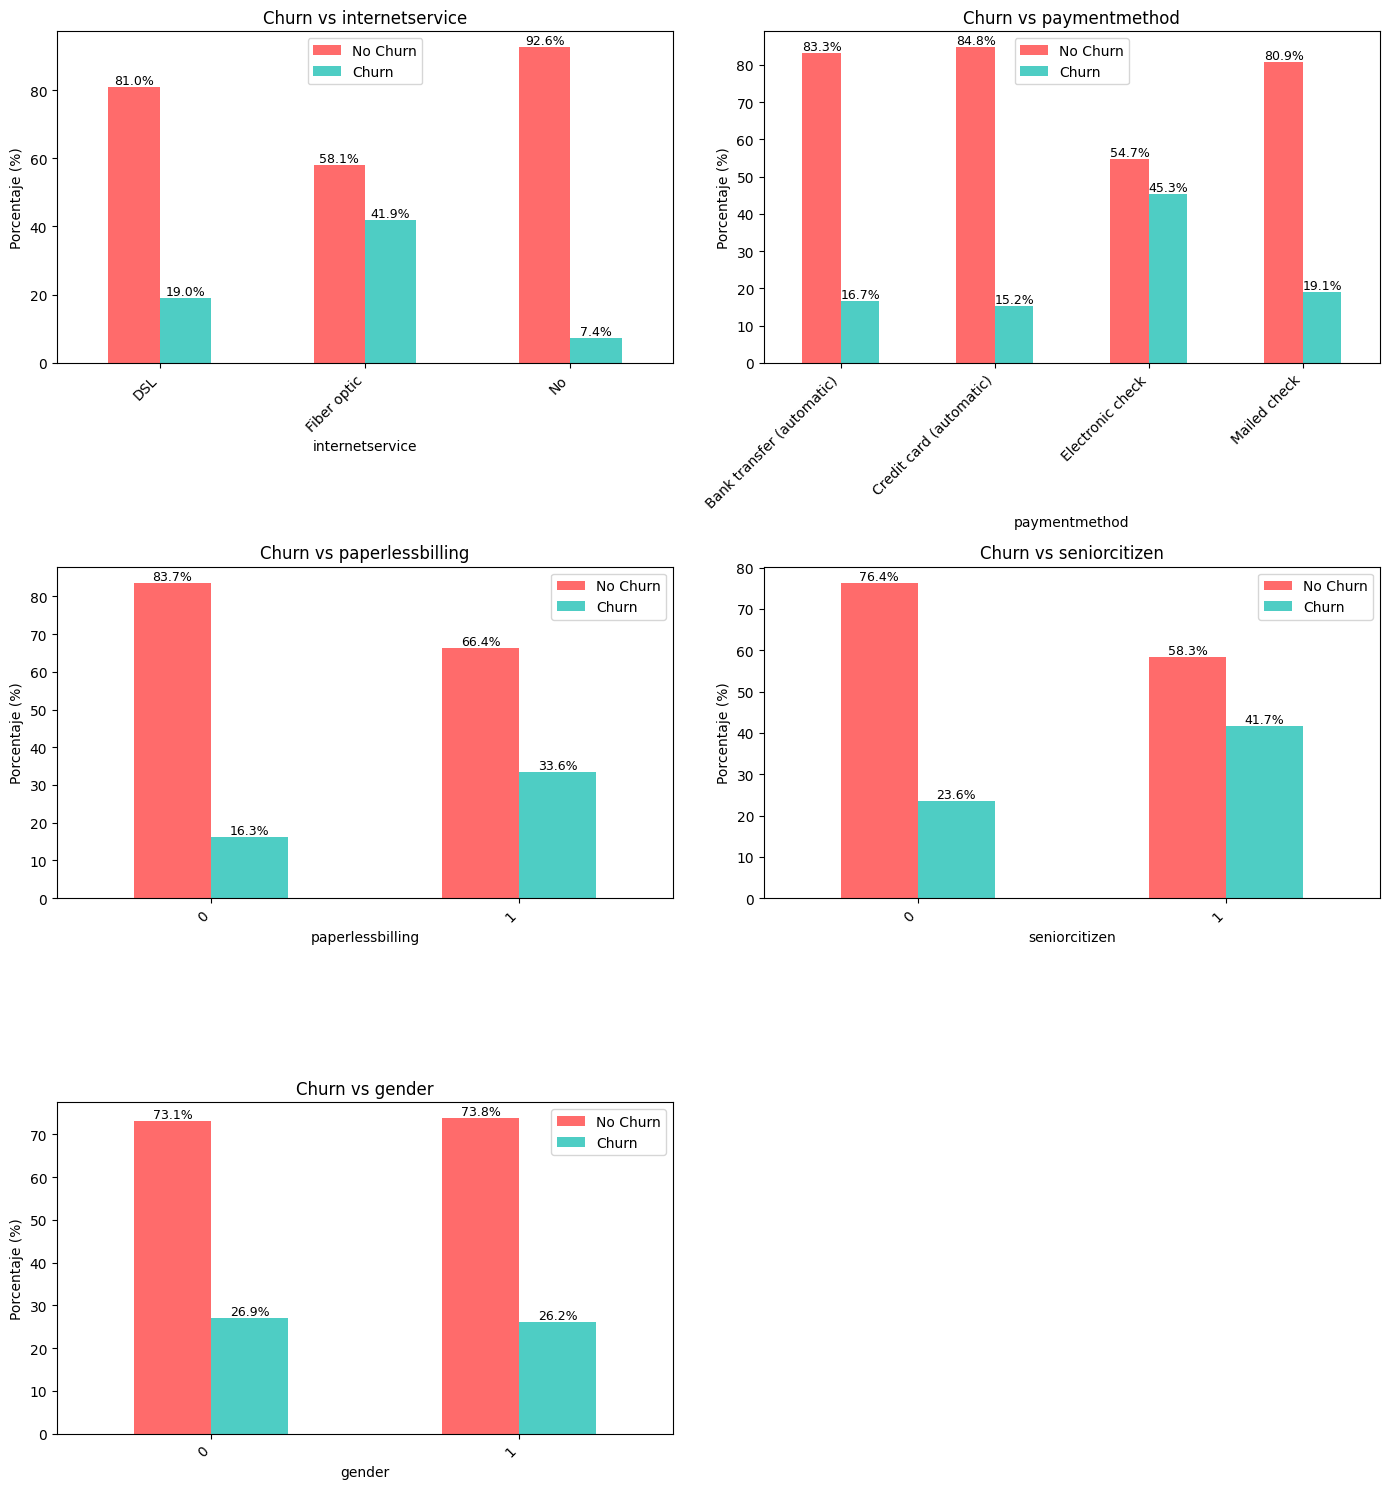

In [ ]:
variables = [
    "internetservice",
    "paymentmethod",
    "paperlessbilling",
    "seniorcitizen",
    "gender"
]

plot_multiple_churn(variables)

Podemos observa que algunas categorias presentan diferencias marcadas en la proporción de churn, por esto podemos entender que ciertas características del cliente influyen significativamente en la probabilidad de cancelación, sobre todo las categorías asociadas a contratos flexibles o menor permanencia nos muestran mayor tasa de abandono.

In [ ]:
df.groupby("churn")[["tenure", "charges_monthly", "charges_total"]].mean()

,tenure,charges_monthly,charges_total
churn,,,
0,37.569965,61.265124,2549.911442
1,17.979133,74.441332,1531.796094


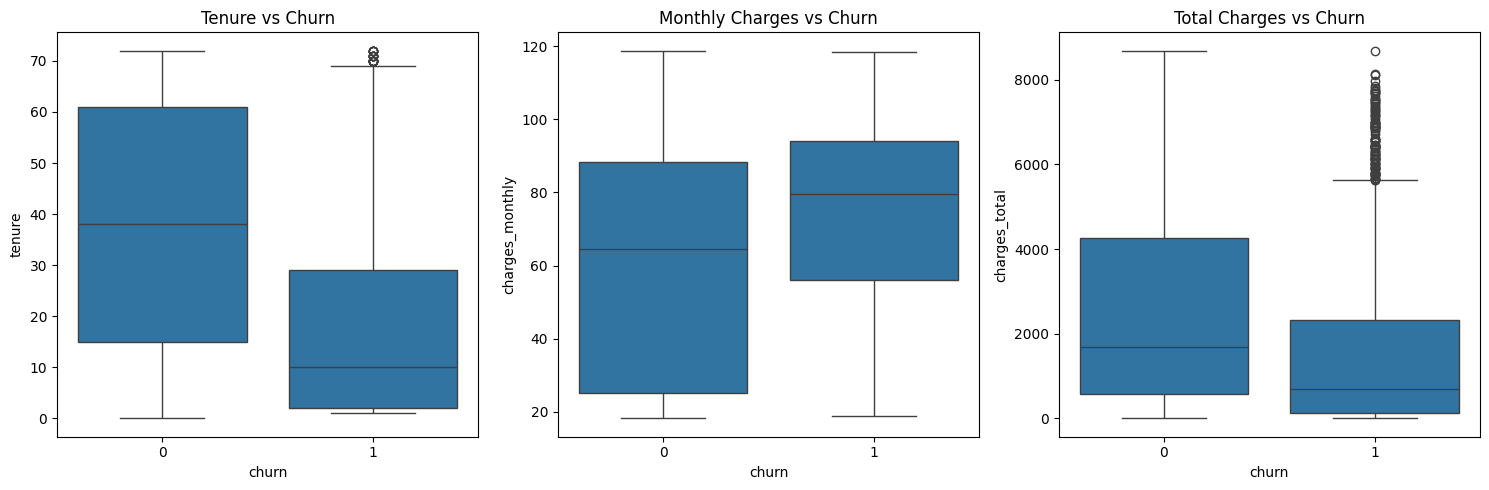

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(x="churn", y="tenure", data=df, ax=axes[0])
axes[0].set_title("Tenure vs Churn")

sns.boxplot(x="churn", y="charges_monthly", data=df, ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn")

sns.boxplot(x="churn", y="charges_total", data=df, ax=axes[2])
axes[2].set_title("Total Charges vs Churn")

plt.tight_layout()
plt.show()

Los clientes que cancelan el servicio presentan una mediana de antigüedad significativamente menor que aquellos que permanecen, lo que indica que el churn ocurre principalmente en etapas tempranas de la relación con el cliente. No obstante, existen algunos casos aislados de cancelación en clientes antiguos (aunque son pocos) haremos grupos por meses para ver mas de cerca esta variable.

In [ ]:
# Crear grupos de meses
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 48, 72],
    labels=['0-6', '6-12', '12-24', '24-48', '48+'],
    include_lowest=True
)
churn_tenure = df.groupby('tenure_group')['churn'].mean()*100

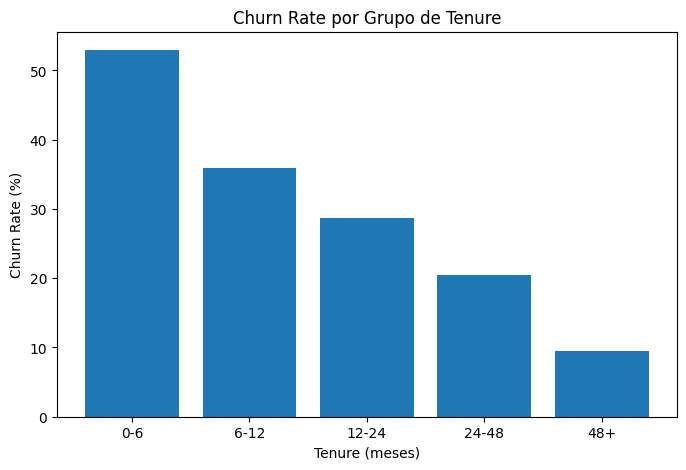

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(churn_tenure.index.astype(str), churn_tenure.values)

plt.title('Churn Rate por Grupo de Tenure')
plt.xlabel('Tenure (meses)')
plt.ylabel('Churn Rate (%)')

plt.show()

Efectivamente, la tasa de **churn** es considerablemente más alta en los primeros meses (0–6), disminuyendo progresivamente deacuerdo a que aumenta la antigüedad. Esto confirma que el riesgo de cancelación es mayor durante el período inicial del cliente

<Axes: xlabel='tenure', ylabel='Density'>

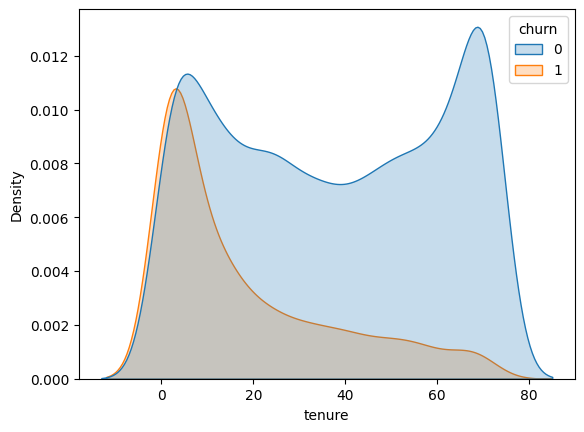

In [ ]:
sns.kdeplot(data=df, x="tenure", hue="churn", fill=True)

__________________________________________________
Ahora realizaremos una grafica de coorelacion para ver que tan correlacionadas estas las variables


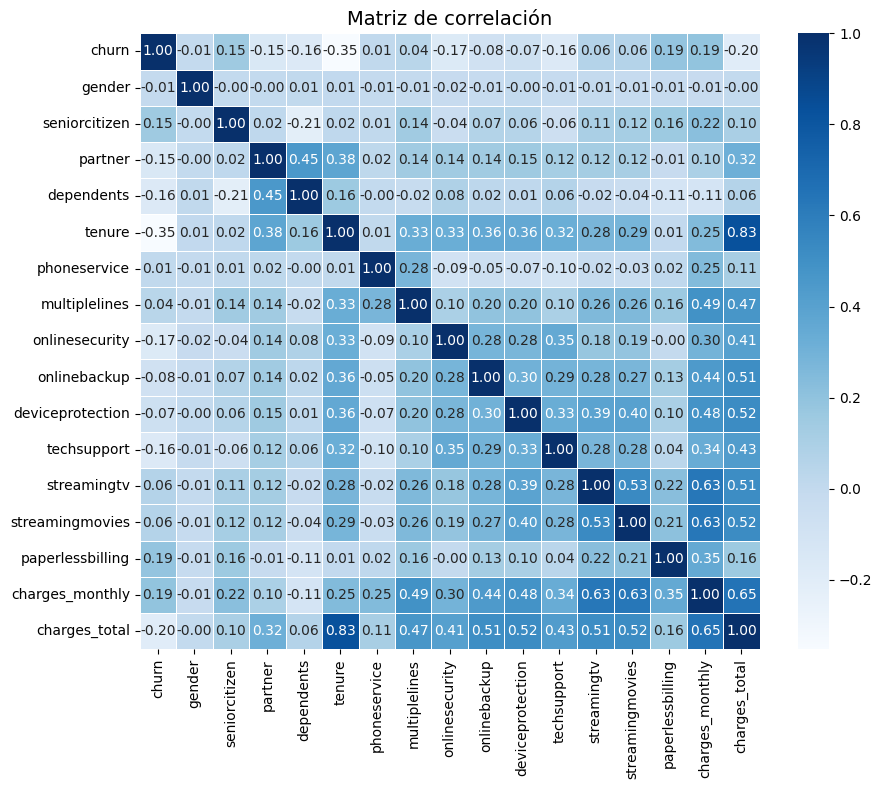

In [ ]:
# Seleccionar solo variables numéricas
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Matriz de correlación
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de correlación", fontsize=14)
plt.show()

La variable tenure presenta la relación más fuerte con churn (correlación negativa), indicando que a mayor antigüedad, menor probabilidad de cancelación. El resto de variables muestran correlaciones débiles, lo que sugiere relaciones no lineales o menor impacto individual, ademas de una correlacion positiva entre **ternure** y **charges_total**

##📄Informe final

### 🔹 1. Introducción



El presente análisis tiene como objetivo identificar los factores asociados a la evasión de clientes (Churn), entendida como la cancelación del servicio por parte del cliente.

La retención de clientes es un problema crítico para las empresas, ya que adquirir nuevos clientes suele ser más costoso que mantener los existentes. Por ello, comprender qué variables influyen en la cancelación permite diseñar estrategias preventivas y reducir la tasa de abandono.

### 🔹 2. Limpieza y Tratamiento de Datos

Durante esta etapa se realizaron los siguientes pasos:

- Importación del dataset y revisión de su estructura.

- Verificación de valores nulos e inconsistencias.

- Conversión de variables categóricas a formato adecuado.

- Transformación de la variable **churn** a formato numérico (0 = No churn, 1 = Churn).

- Revisión de tipos de datos y corrección de variables mal tipadas.

- Creación de variables adicionales como **tenure_group** para analizar la antigüedad en rangos.

Este proceso permitió asegurar la calidad y consistencia de los datos antes del análisis exploratorio.

### 🔹 3. Análisis Exploratorio de Datos (EDA)

Se realizaron distintos análisis para identificar patrones asociados al churn:



#### 📊 Variables categóricas

Los gráficos de barras mostraron diferencias importantes en la tasa de churn según el tipo de contrato. Los contratos mensuales **(month-to-month)** presentan una tasa de cancelación considerablemente mayor que los contratos anuales o bianuales.

Otras variables categóricas mostraron menor impacto individual.



#### 📦 Antigüedad del cliente (Tenure)

El boxplot de tenure evidenció una diferencia clara entre clientes que permanecen y clientes que cancelan:

- Los clientes que churn presentan una mediana de antigüedad significativamente menor.

- La mayoría de cancelaciones ocurre en los primeros meses.

- Existen algunos casos aislados de clientes antiguos que también cancelan, pero son minoritarios.



#### 📈 Churn por grupos de antigüedad

Al segmentar la variable tenure en rangos (0–6, 6–12, 12–24, etc.), se observó que:

- La tasa de **churn** es más alta en los primeros 6 meses.

- Disminuye progresivamente conforme aumenta la antigüedad.

- Los clientes con más de 24 meses presentan una tasa de cancelación considerablemente menor.

- Esto confirma que el abandono es principalmente un fenómeno temprano.



#### 📊 Correlación

El análisis de correlación mostró que:

- **tenure** tiene una correlación negativa moderada con **churn**, lo que indica que a mayor antigüedad, menor probabilidad de cancelación.

- El resto de variables presentan correlaciones débiles, lo que sugiere relaciones no lineales o efectos combinados.

###🔹 4. Conclusiones e Insights



A partir del análisis realizado, se identificaron los siguientes hallazgos clave:

1. El **churn** ocurre principalmente en los primeros meses del cliente.

2. Los contratos mensuales presentan mayor riesgo de cancelación.

3. La antigüedad es uno de los factores más relevantes en la predicción del churn.

4. Las variables demográficas presentan menor impacto individual.

En general, el problema de evasión no es uniforme en toda la base de clientes, sino que está concentrado en un segmento específico: clientes nuevos con contratos flexibles.

###🔹 5. Recomendaciones



Con base en los hallazgos, se proponen las siguientes estrategias:

- 🎯 Implementar programas de fidelización durante los primeros 6 meses.

- 📞 Reforzar el seguimiento y soporte al cliente en etapa temprana.

- 💰 Ofrecer incentivos para migrar de contratos mensuales a planes anuales.

- 🤖 Desarrollar un modelo predictivo de churn que permita identificar clientes en riesgo y aplicar acciones preventivas.

Reducir la evasión en la etapa inicial puede generar un impacto significativo en la rentabilidad y estabilidad del negocio.